# The Non Random Two Liquids (NRTL) model for *excess Gibbs energy* ($g^E$) and a case study of the Gibbs energy of mixing of water+ethanol+ethyl acetate.

# The Non Random Two Liquids (NRTL) model

Calculates excess Gibbs energy and its derivatives: e.g. activity coefficients $\underline{\gamma}$ and excess molar enthalpy $h^E$ at given $T$, $P$ and composition $\underline {x}$ for a liquid mixture.


## Model overview


$$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \left[ \tau_{j,i} G_{j,i} x_{j} \right] }{\sum_{k=1}^n \left[ G_{k,i} x_k \right] } \right] $$

Where

> $\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$
>
> $G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$

And either each $(g_{i,j}-g_{j,j})$ difference, in units of energy, or  each $A_{i,j}$ binary parameter, in units of temperature, are usually fitted to experimental data and published.

The activities coefficients are calculated from the derivative of excess gibbs energy with respect to mole number of componente i ($n_i=N x_i$) with T, P and mole number of every other component held constant, ($RTln(\gamma_i) = {\partial g^E}/{ \partial n_i}$)therefore:


$$ln(\gamma_i)=  \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{k=1}^n\left[\tau_{k,i} G_{k,i} x_{k}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $$

## References:

### The NRTL model' original paper
* Renon H., Prausnitz J. M., Local Compositions in Thermodynamic Excess Functions for Liquid Mixtures, AIChE J., 14_1, S.135–144, 1968 [doi:10.1002/aic.690140124](https://doi.org/10.1002/aic.690140124)



### The NRTL model in some books
* Prausnitz, Lichtenthaler & Azevedo, Molecular Thermodynamic of Fluid Phase Equilibria, 1998 [ISBN-10: 0139777458](https://books.google.com.br/books?id=VSwc1XUmYpcC)

### More papers on the NRTL model
* Abreu, C. R. A., Matrix Algebra and Matrix Differentiation Rules Applied to Excess Gibbs Energy Models, Lecture notes available [here][Abreu, yyyy, LN, Matrix algebra...].

[Abreu, yyyy, LN, Matrix algebra...]: https://github.com/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/Get_involved/4_Texts_Library/AbreuC.R.A.%2C%20Matrix%20Algebra%20and%20Matrix%20Differentiation%20Rules%20Applied%20to%20Excess%20Gibbs%20Energy%20Models.pdf

# Starting the computational implementation of the model:

Gather the needed packages here

In [20]:
import numpy as np

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
#unit system constant
from scipy.constants import R
print('R = ',R)

R =  8.3144598


## Model inputs

Experimental parameters from Renon et al., (1969)

### References:

Renon, Henri, and J. M. Prausnitz. "Estimation of parameters for the NRTL equation for excess Gibbs energies of strongly nonideal liquid mixtures." Industrial & Engineering Chemistry Process Design and Development 8.3 (1969): 413-419.
[DOI:10.1021/i260031a019]( https://doi.org/10.1021/i260031a019)

## Thermodynamics *degrees of freedom*
Excess gibbs energy, and activity coefficients are natural functions of temperature $(T)$, pressure $(P)$ and composition $(\underline{x})$.
Here, we will consider the system studied by Renon et al. (1969), they regressed parameters with which the model is valid for constant pressure of 1 atm.
The remaining thermodynamics *degrees of freedom* required to calculate a set of activity coefficients are the temperature and composition.
We set trial values below:

In [51]:
#trial temperature and composition:
T = 293.15 #K
x=np.array([.1,.3,.6]) #normalized

## Fitted parameters
Renon et al. (1969) fitted 1 $\alpha$ valid for all 3 binary interactions $\{(1,2),(1,3),(2,3)\}$ parameter and 6 $A_{i,j}$ parameters, two for each binary interaction filling a non symmetric $A$ matrix.

In [52]:
# Ethyl acetate (1) + water (2) + ethanol (3)

alpha12 = 0.4

alpha23 = 0.3

alpha13 = 0.3

# 6 binary Aij parameters
Dg12 = 1335 * 4.184 #J/K
Dg21 = 2510 * 4.184 #J/K

Dg23 = 976 * 4.184 #J/K
Dg32 = 88 * 4.184 #J/K

Dg13 = 301 * 4.184 #J/K
Dg31 = 322 * 4.184 #J/K


## Feeding the fitted parameters to the model in matrix structure:
we will assemble the parameters in a matrix structure so that we can access each parameter by its index, as in
`A[0,0]` and `A[0,1]`rather than as `A11` and `A12`, so we can loop trough all of them using an iterator, see below:

In [53]:
#assemble matrix with regressed parameters Dg_i,j, according to the model all diagonal terms are zero
Dg = np.array([[0, Dg12, Dg13],
             [Dg21, 0, Dg23],
             [Dg31, Dg32, 0]])


#assemble symmetric matrix alpha
alpha = np.array([[0, alpha12, alpha13],
                [alpha12, 0, alpha23],
                [alpha13, alpha23, 0]])

In [54]:
#verify the assembled matrices

#we can now automatically loop through its elements
print('loop through its elements')
print("i,j,alpha[i,j],Dg[i,j]")
for i in range(3):
    for j in range(3):
        print(i,j,alpha[i,j],Dg[i,j])
        
#or even use the whole matrix at once
print('whole matrix')
print("alpha=")
print(alpha)
print("Dg=")
print(Dg)

# rather than typing each element individually
print('typing each element')
print("alpha12,alpha13,alpha23")
print(alpha12,alpha13,alpha23)
print("Dg12,Dg13,Dg21,Dg23,Dg31,Dg32")
print(Dg12,Dg13,Dg21,Dg23,Dg31,Dg32)


loop through its elements
i,j,alpha[i,j],Dg[i,j]
0 0 0.0 0
0 1 0.4 1335
0 2 0.3 301
1 0 0.4 2510
1 1 0.0 0
1 2 0.3 976
2 0 0.3 322
2 1 0.3 88
2 2 0.0 0
whole matrix
alpha=
[[ 0.   0.4  0.3]
 [ 0.4  0.   0.3]
 [ 0.3  0.3  0. ]]
Dg=
[[   0 1335  301]
 [2510    0  976]
 [ 322   88    0]]
typing each element
alpha12,alpha13,alpha23
0.4 0.3 0.3
Dg12,Dg13,Dg21,Dg23,Dg31,Dg32
1335 301 2510 976 322 88


In [55]:
#finally calculate parameter A in units of K-1 from Dg and the constant R
A = Dg/R 


## Model equations
We first implement the model equations in a script-wise manner, considering the models input - the regressed parameters and thermodynamic degrees of freedom previously defined.

In [56]:
tau=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)
        
G=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          0.5477184   0.12349306]
 [ 1.02979264  0.          0.40042933]
 [ 0.13210886  0.03610428  0.        ]]
G=
[[ 1.          0.80325154  0.96362996]
 [ 0.66237921  1.          0.88680621]
 [ 0.96114244  0.98922716  1.        ]]


In [57]:
Gamma=np.zeros([3])
for i in range(3):

    Sj1=0
    Sj2=0
    Sj3=0
    for j in range(3):
        Sj1     += tau[j,i]*G[j,i]*x[j]
        Sj2     += G[j,i]*x[j]

        Sk1=0
        Sk2=0
        Sk3=0
        for k in range(3):
            Sk1+=G[k,j]*x[k]
            Sk2+=x[k]*tau[k,j]*G[k,j]
            Sk3+=G[k,j]*x[k]
        
        Sj3     += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
    
    Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
print(Gamma)

[ 1.4967744   1.28850578  1.01628367]


## *Functionize* the model

> "taking a block of code and converting it into a function that can be inherited (or included once) and called by various other programs sometimes over and over again." -[functionize](http://www.urbandictionary.com/define.php?term=functionize)

In order for us to be able to re-use this model in different works we would like to functionize it, so we could call this function with different parameters and thermodynamic conditions, and with that make recursive usage to:
* create plots for a given system - varying x and T
* find solutions in phase equilibrium algorithms - varying x and T
* study different systems - varying component-dependent parameters
* perform parameter regression - varying parameter values to correlate data for a given system

$$\underline{\gamma} \leftarrow {\gamma} \left(T,\underline {x}, \underline {\underline{\alpha}}, \underline {\underline{\tau}}\right)$$

## def model(arguments):
Functionizing the model is straightforward: we just copy the expressions already presented in the script-wise approach
and then wrap them in a `def` block with clear inputs:

    def Gamma(T,x,alpha,A):

and clear outputs:

    return Gamma

In [58]:
def Gamma(T,x,alpha,A):
    tau=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([3,3])
    for j in range(3):
        for i in range(3):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([3])
    for i in range(3):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(3):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(3):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

In [59]:
#test it to see if results match
ans=Gamma(T,x,alpha,A)
print(ans) #ttest using those trial input

[ 1.4967744   1.28850578  1.01628367]


In [60]:
# test predictions of activity coefficients at infinite dillution
ans=Gamma(T,[1,0,0],alpha,A)
print("in ~pure Ethyl acetate liquid, Ethyl acetate's itself activity coefficient is ",ans[0])
print("ethanol infinite dillution activity coefficient is ", ans[2])
print("and water infinite dillution activity coefficient is ", ans[1])

ans=Gamma(T,[0,1,0],alpha,A)

print("in ~pure ethanol liquid, ethanol's itself activity coefficient is ",ans[2])
print("Ethyl acetate infinite dillution activity coefficient is ", ans[0])
print("and water infinite dillution activity coefficient is ", ans[1])

ans=Gamma(T,[0,0,1],alpha,A)

print("in ~pure water liquid, water's itself activity coefficient is ",ans[1])
print("ethanol infinite dillution activity coefficient is ", ans[2])
print("and Ethyl acetate infinite dillution activity coefficient is ", ans[0])

in ~pure Ethyl acetate liquid, Ethyl acetate's itself activity coefficient is  1.0
ethanol infinite dillution activity coefficient is  1.28462711286
and water infinite dillution activity coefficient is  3.42065358364
in ~pure ethanol liquid, ethanol's itself activity coefficient is  1.54673254292
Ethyl acetate infinite dillution activity coefficient is  4.34814054323
and water infinite dillution activity coefficient is  1.0
in ~pure water liquid, water's itself activity coefficient is  1.47876532665
ethanol infinite dillution activity coefficient is  1.0
and Ethyl acetate infinite dillution activity coefficient is  1.28545208207


## As a first graphical result we can plot the Excess Gibbs energy as a function of mole fraction of one component ina  binary mixture

In [63]:
# Ethyl acetate (1) + water (2) + ethanol (3)

#consider a mixture of (2) and (3)

T=298

xEA=np.zeros(100)
xW=np.linspace(0,1,100)
xE=1-xEA-xW

GE = np.zeros(100)
GM = np.zeros(100)
GIM = np.zeros(100)


GIM[0]=0
GIM[99]=0
for i in range(1,99):  # from 1 to 98, inclusive
    GIM[i]=(R*T*(xW[i]*np.log(xW[i])+
                 xE[i]*np.log(xE[i])))


for i in range(100):
    
    gammas=Gamma(T,[xEA[i],xW[i],xE[i]],alpha,A)
    
    GE[i]=(R*T*(xW[i]*np.log(gammas[1])+
                xE[i]*np.log(gammas[2])))
    
    GM[i]=GIM[i]+GE[i]

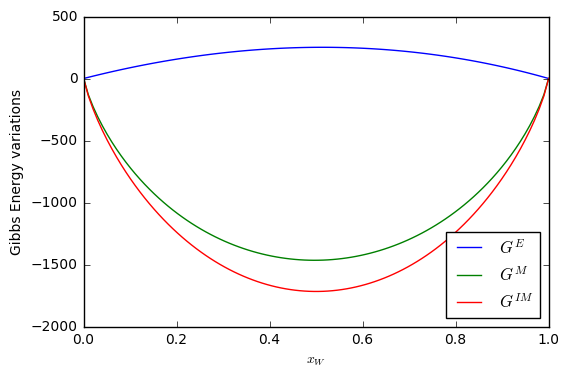

In [64]:
plt.ylabel(r'Gibbs Energy variations')
plt.xlabel(r'$x_W$')
plt.plot(xW,GE,label=r'$G^E$')
plt.plot(xW,GM,label=r'$G^{M}$')
plt.plot(xW,GIM,label=r'$G^{IM}$')
plt.legend(loc=4)
plt.show()

In [80]:
#for a 3 component system we can conceive 3 binary

import itertools as it
binaries = list(it.combinations([0, 1, 2],2))

print(binaries)

# figs = np.ndarray(3,dtype=object)
# axs = np.ndarray(4,dtype=object)

GE = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])
GM = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])
GIM = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])

for ibin in range(3):

#    figs[ibin], axs[ibin] = plt.subplots(1,1)

    
    T=298

    x=np.zeros([100,3])
    
#    print(binaries[ibin][0])
    compA=binaries[ibin][0]
#    print(binaries[ibin][1])
    compB=binaries[ibin][1]
    
    x[:,compA]=np.linspace(0,1,100)
    x[:,compB]=1-x[:,compA]
    
#    print(x[0,:])    
#    print(x[1,:])    
#    print(x[50,:])    
#    print(x[98,:])    
#    print(x[99,:])    

#    GIM[0]=0
#    GIM[99]=0

    for i in range(1,99):  # from 1 to 98, inclusive
        GIM[ibin][i]=(R*T*(x[i,compA]*np.log(x[i,compA])+
                     x[i,compB]*np.log(x[i,compB])))

    
    for i in range(100):
        gammas=Gamma(T,x[i,:],alpha,A)
        GE[ibin][i]=(R*T*(x[i,compA]*np.log(gammas[compA])+
                    x[i,compB]*np.log(gammas[compB])))
        GM[ibin][i]=GIM[ibin][i]+GE[ibin][i]
        
#    axs[ibin].set_ylabel(r'Gibbs Energy variations')
#    axs[ibin].set_xlabel(r'$x_W$')
#    axs[ibin].set_title(str(compA)+str(compB))
#    axs[ibin].plot(x[:,compA],GE[ibin],label=r'$G^E$')
#    axs[ibin].plot(x[:,compA],GM[ibin],label=r'$G^{M}$')
#    axs[ibin].plot(x[:,compA],GIM[ibin],label=r'$G^{IM}$')
#    axs[ibin].legend(loc=4)

    
# plt.show()
        

[(0, 1), (0, 2), (1, 2)]


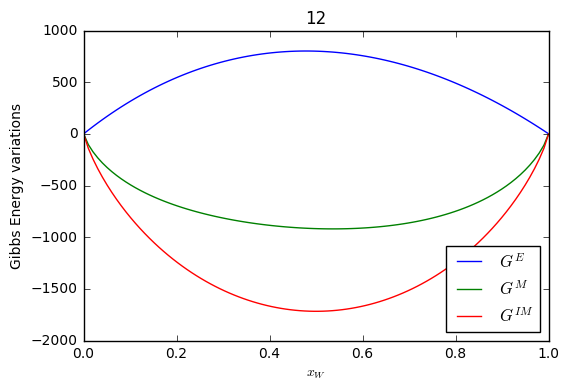

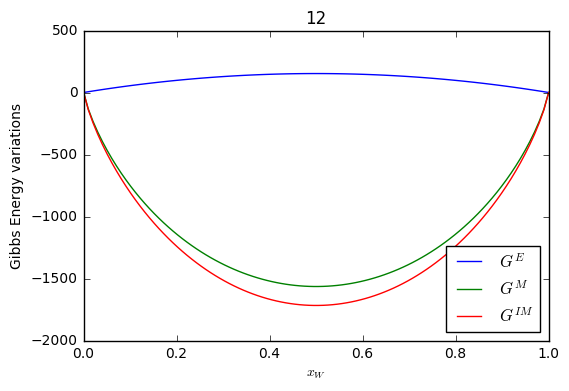

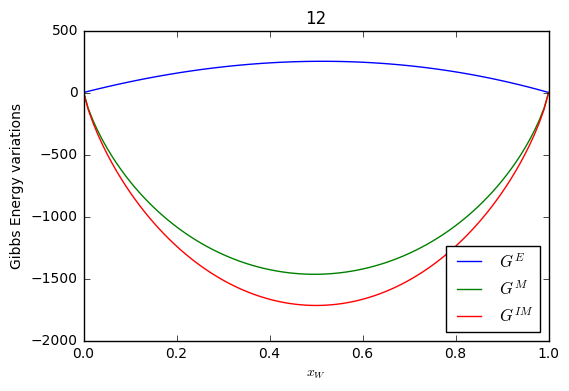

In [81]:
#for a 3 component system we can conceive 3 binary

#import itertools as it
#binaries = list(it.combinations([0, 1, 2],2))

#print(binaries)

figs = np.ndarray(3,dtype=object)
axs = np.ndarray(4,dtype=object)

#GE = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])
#GM = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])
#GIM = np.asarray([np.zeros(100),np.zeros(100),np.zeros(100)])

for ibin in range(3):

    figs[ibin], axs[ibin] = plt.subplots(1,1)

    
#    T=298

#    x=np.zeros([100,3])
    
#    print(binaries[ibin][0])
#    compA=binaries[ibin][0]
#    print(binaries[ibin][1])
#    compB=binaries[ibin][1]
    
#    x[:,compA]=np.linspace(0,1,100)
#    x[:,compB]=1-x[:,compA]
    
#    print(x[0,:])    
#    print(x[1,:])    
#    print(x[50,:])    
#    print(x[98,:])    
#    print(x[99,:])    

#    GIM[0]=0
#    GIM[99]=0

#    for i in range(1,99):  # from 1 to 98, inclusive
#        GIM[ibin][i]=(R*T*(x[i,compA]*np.log(x[i,compA])+
#                     x[i,compB]*np.log(x[i,compB])))

    
#    for i in range(100):
#        gammas=Gamma(T,x[i,:],alpha,A)
#        GE[ibin][i]=(R*T*(x[i,compA]*np.log(gammas[compA])+
#                    x[i,compB]*np.log(gammas[compB])))
#        GM[ibin][i]=GIM[ibin][i]+GE[ibin][i]
        
    axs[ibin].set_ylabel(r'Gibbs Energy variations')
    axs[ibin].set_xlabel(r'$x_W$')
    axs[ibin].set_title(str(compA)+str(compB))
    axs[ibin].plot(x[:,compA],GE[ibin],label=r'$G^E$')
    axs[ibin].plot(x[:,compA],GM[ibin],label=r'$G^{M}$')
    axs[ibin].plot(x[:,compA],GIM[ibin],label=r'$G^{IM}$')
    axs[ibin].legend(loc=4)

    
plt.show()
        

In [45]:
#we can make 1 meshgrid

xEA = np.linspace(0,1,10)
xW = np.linspace(0,1,10)
xE = np.linspace(0,1,10)

rawxizes = np.ndarray((10,10,10), dtype=object)

flags = np.zeros((10,10,10))

for i in range(10):
    for j in range(10):
        for k in range(10):
            rawxizes[i,j,k]=np.array([xEA[i],xW[j],xE[k]])
            if ( rawxizes[i,j,k][0] + rawxizes[i,j,k][1] +  rawxizes[i,j,k][2] == 1 ):
                flags[i,j,k] = 1
            
xizes = rawxizes[np.where(flags==1)]

npts = xizes.shape[0]
print(npts)

print(xizes[0])
print(xizes[0][2])

GE = np.zeros(npts)

for l in range(npts):
    gammas=Gamma(T,np.array(xizes[l]),alpha,A)
    GE[l] = R*T*(xizes[l][0]*np.log(gammas[0])+
                 xizes[l][1]*np.log(gammas[1])+
                 xizes[l][2]*np.log(gammas[2]))

    def xlogx(x):
        if x==0:
            return 0
        else:
            return x*np.log(x)
    
    GIM[l] = R*T*(xlogx(xizes[l][0])+
                  xlogx(xizes[l][1])+
                  xlogx(xizes[l][2]))

    GM[l] = GE[l]+GIM[l]
            
print(rawxizes[0,0,0])
print(rawxizes[3,5,7])
print(rawxizes[9,9,9])

print(xizes[0])
print(xizes[1])
print(xizes[10])
print(xizes[42])
print(xizes[43])
            

import matplotlib.tri as tri

# first load some data:  format x1,x2,x3,value
print('testdata')
print(xizes[0])
print(GM[0])

test_data = np.zeros([npts,4])

for l in range(npts):
    test_data[l,0:3] = xizes[l][:]
    test_data[l,3] = GM[l]

print(test_data[0])

44
[ 0.  0.  1.]
1.0
[ 0.  0.  0.]
[ 0.33333333  0.55555556  0.77777778]
[ 1.  1.  1.]
[ 0.  0.  1.]
[ 0.          0.11111111  0.88888889]
[ 0.11111111  0.33333333  0.55555556]
[ 0.88888889  0.11111111  0.        ]
[ 1.  0.  0.]
testdata
[ 0.  0.  1.]
0.0
[ 0.  0.  1.  0.]


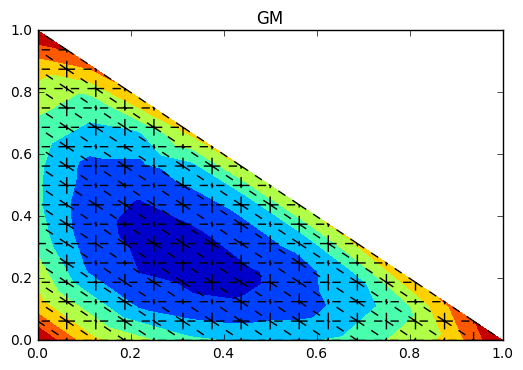

In [46]:

# barycentric coords: (a,b,c)
a=test_data[:,0]
b=test_data[:,1]
c=test_data[:,2]

# values is stored in the last column
v = test_data[:,-1]

# create a triangulation out of these points
#Tri = tri.Triangulation(cartx,carty)
Tri = tri.Triangulation(a,b)

# plot the contour
#plt.tricontourf(cartx,carty,Tri.triangles,v)
plt.tricontourf(a,b,Tri.triangles,v)


# create the grid
#corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
corners = np.array([[0, 0], [1, 0], [0,1]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')

plt.title('GM')
#plt.axis('off')
plt.show()

# prepare a pretty figure for the graphical abstract 

[(0, 1), (0, 2), (1, 2)]


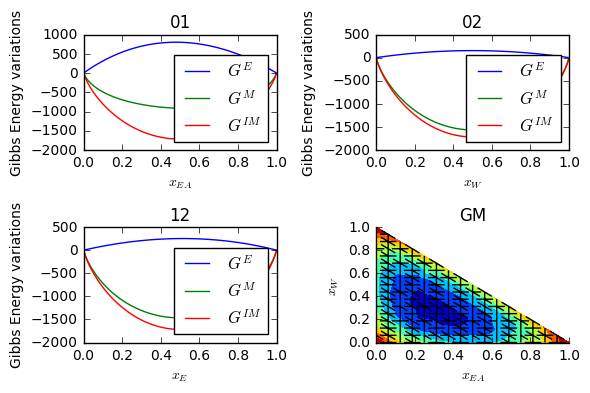

In [96]:
#for a 3 component system we can conceive 3 binary

from matplotlib import pyplot as plt
%matplotlib inline

import itertools as it
binaries = list(it.combinations([0, 1, 2],2))

print(binaries)

figs = np.ndarray(3,dtype=object)
axs = np.ndarray(4,dtype=object)

fig, ((axs[0],axs[1]),(axs[2],axs[3])) = plt.subplots(2,2)

for ibin in range(3):
    
#    figs[ibin], axs[ibin] = plt.subplots(1,1)
    
    T=298

    x=np.zeros([100,3])
    
#    print(binaries[ibin][0])
    compA=binaries[ibin][0]
#    print(binaries[ibin][1])
    compB=binaries[ibin][1]
    
    x[:,compA]=np.linspace(0,1,100)
    x[:,compB]=1-x[:,compA]
    
#    print(x[0,:])    
#    print(x[1,:])    
#    print(x[50,:])    
#    print(x[98,:])    
#    print(x[99,:])    
    
    GE = np.zeros(100)
    GM = np.zeros(100)
    GIM = np.zeros(100)

    GIM[0]=0
    GIM[99]=0
    for i in range(1,99):  # from 1 to 98, inclusive
        GIM[i]=(R*T*(x[i,compA]*np.log(x[i,compA])+
                     x[i,compB]*np.log(x[i,compB])))

    
    for i in range(100):
        gammas=Gamma(T,x[i,:],alpha,A)
        GE[i]=(R*T*(x[i,compA]*np.log(gammas[compA])+
                    x[i,compB]*np.log(gammas[compB])))
        GM[i]=GIM[i]+GE[i]
        
    axs[ibin].set_ylabel(r'Gibbs Energy variations')

    axs[ibin].set_title(str(compA)+str(compB))
    axs[ibin].plot(x[:,compA],GE,label=r'$G^E$')
    axs[ibin].plot(x[:,compA],GM,label=r'$G^{M}$')
    axs[ibin].plot(x[:,compA],GIM,label=r'$G^{IM}$')
    axs[ibin].legend(loc=4)

axs[0].set_xlabel(r'$x_{EA}$')
axs[1].set_xlabel(r'$x_W$')
axs[2].set_xlabel(r'$x_E$')

axs[3].set_xlabel(r'$x_{EA}$')
axs[3].set_ylabel(r'$x_{W}$')

# barycentric coords: (a,b,c)
a=test_data[:,0]
b=test_data[:,1]
c=test_data[:,2]

# values is stored in the last column
v = test_data[:,-1]

# translate the data to cartesian corrds
#cartx = 0.5 * ( 2.*b+c ) / ( a+b+c )
#carty = 0.5*np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
#Tri = tri.Triangulation(cartx,carty)
Tri = tri.Triangulation(a,b)

# plot the contour
#axs[3].tricontourf(cartx,carty,Tri.triangles,v)
axs[3].tricontourf(a,b,Tri.triangles,v)


# create the grid
#corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
corners = np.array([[0, 0], [1, 0], [0,1]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
axs[3].triplot(trimesh,'k--')

axs[3].set_title('GM')
#axs[3].axis('off')

plt.tight_layout()

axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].yaxis.set_ticks_position('left')
axs[3].xaxis.set_ticks_position('bottom')

plt.show()
        
